In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
#define state
class BMI_state(TypedDict):
    weight:float
    height:float                   
    bmi:float
    cat:str

In [3]:
def calculate_bmi(state: BMI_state) -> BMI_state:
    w = state['weight']
    h = state['height']
    b = w/(h **2)
    state['bmi'] = round(b,2)
    return state

In [9]:
def category(state: BMI_state) -> BMI_state:
    bmi=state['bmi']
    if bmi<20:
        state['cat'] = 'underweighted'
    elif bmi < 25:
        state['cat'] = 'normal'
    else:
        state['cat'] = 'over weight'
    return state
        

In [10]:
#define graph
graph= StateGraph(BMI_state)

In [11]:
#define node
graph.add_node("bmi_calculation",calculate_bmi)
graph.add_node("category", category)

In [12]:
#define edge
graph.add_edge(START, "bmi_calculation")
graph.add_edge("bmi_calculation","category")
graph.add_edge("category",END)

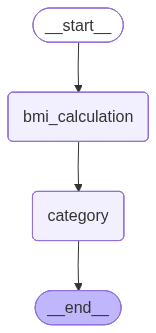

In [13]:
#define compile graph
workflow= graph.compile()
workflow

In [14]:
# execution
result=workflow.invoke({"weight":80,"height":1.6})

In [30]:
for i,j in result.items():
    print(i,j)

weight 80
height 1.6
bmi 31.25
cat over weight
